<a href="https://colab.research.google.com/github/tarcisiocsn/OpenDataQuebec/blob/main/cluster_count_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering analysis - Using the count flow data

In [2]:
# import packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
histo_merged_direction = pd.read_csv(r'/histo_merged_direction.csv')
histo_merged_direction

,SECTN,ANNEE,DJMA_total,DJME_total,DJMH_total
0,0001012500,2011,78000.0,84000.0,74000.0
1,0001012500,2012,76000.0,82000.0,74000.0
2,0001012500,2013,78000.0,85000.0,74000.0
3,0001012500,2014,78000.0,85000.0,74000.0
4,0001012500,2015,80000.0,86000.0,75000.0
...,...,...,...,...,...
4756,S001346879,2016,490.0,490.0,480.0
4757,S001346879,2019,460.0,440.0,460.0
4758,S001346879,2020,230.0,180.0,350.0
4759,S001346879,2021,220.0,210.0,210.0


In [4]:
fact84_merged_direction = pd.read_csv(r'/fact84_merged_direction.csv')
fact84_merged_direction

,SECTN,ANNEE,MOIS,DIMANCHE,LUNDI,MARDI,MERCREDI,JEUDI,VENDREDI,SAMEDI,MOYEN
0,0005512000,2016,Janvier,10170.0,10400.0,9640.0,10180.0,10490,13200.0,9800,10600.0
1,0005512000,2016,Février,10780.0,10710.0,10580.0,10720.0,11680,13970.0,10420,11300.0
2,0005512000,2016,Mars,12060.0,10770.0,11170.0,11410.0,12260,13850.0,11780,11900.0
3,0005512000,2016,Avril,11910.0,11280.0,11220.0,11660.0,12450,14590.0,12390,12300.0
4,0005512000,2016,Mai,13270.0,12090.0,11880.0,12130.0,12920,15370.0,12860,12900.0
...,...,...,...,...,...,...,...,...,...,...,...
47431,0002062000,2018,Août,22080.0,16230.0,14790.0,15230.0,17230,19850.0,19330,17800.0
47432,0002062000,2018,Septembre,15290.0,12280.0,11360.0,12000.0,13070,14720.0,12450,13000.0
47433,0002062000,2018,Octobre,12670.0,11400.0,10800.0,11080.0,12100,13530.0,11260,11800.0
47434,0002062000,2018,Novembre,11420.0,10010.0,9180.0,9390.0,11010,12610.0,9280,10400.0


In [5]:
hour_merged_direction = pd.read_csv(r'/hour_merged_direction.csv')
hour_merged_direction

,SECTN,ANNEE,VOIE_11,HRE,VOIE_12,DIMANCHE,SAMEDI,OUVRABLE
0,0005512000,2016,11.0,0-1,12.0,184.0,160.0,77.0
1,0005512000,2016,11.0,1-2,12.0,90.0,72.0,35.0
2,0005512000,2016,11.0,2-3,12.0,46.0,42.0,31.0
3,0005512000,2016,11.0,3-4,12.0,31.0,36.0,35.0
4,0005512000,2016,11.0,4-5,12.0,25.0,41.0,80.0
...,...,...,...,...,...,...,...,...
98845,0002062000,2018,NaN,20-21,12.0,512.0,366.0,332.0
98846,0002062000,2018,NaN,21-22,12.0,308.0,341.0,245.0
98847,0002062000,2018,NaN,22-23,12.0,175.0,289.0,172.0
98848,0002062000,2018,NaN,23-24,12.0,96.0,179.0,108.0


In [6]:
hour_merged_direction.drop(columns=['VOIE_11', 'VOIE_12'], inplace=True)

In [7]:
# Merge the fact84_merged_direction and histo_merged_direction dataframes on SECTN and ANNEE
normalize_fact84_merged = fact84_merged_direction.merge(histo_merged_direction, on=['SECTN', 'ANNEE'], how='left')

In [78]:
# Merge the fact84_merged_direction and histo_merged_direction dataframes on SECTN and ANNEE
normalize_hour_merged = hour_merged_direction.merge(histo_merged_direction, on=['SECTN', 'ANNEE'], how='left')

In [79]:
normalize_hour_merged

,SECTN,ANNEE,HRE,DIMANCHE,SAMEDI,OUVRABLE,DJMA_total,DJME_total,DJMH_total
0,0005512000,2016,0-1,184.0,160.0,77.0,12900.0,14400.0,11300.0
1,0005512000,2016,1-2,90.0,72.0,35.0,12900.0,14400.0,11300.0
2,0005512000,2016,2-3,46.0,42.0,31.0,12900.0,14400.0,11300.0
3,0005512000,2016,3-4,31.0,36.0,35.0,12900.0,14400.0,11300.0
4,0005512000,2016,4-5,25.0,41.0,80.0,12900.0,14400.0,11300.0
...,...,...,...,...,...,...,...,...,...
98845,0002062000,2018,20-21,512.0,366.0,332.0,11800.0,14600.0,9500.0
98846,0002062000,2018,21-22,308.0,341.0,245.0,11800.0,14600.0,9500.0
98847,0002062000,2018,22-23,175.0,289.0,172.0,11800.0,14600.0,9500.0
98848,0002062000,2018,23-24,96.0,179.0,108.0,11800.0,14600.0,9500.0


In [80]:
# Step 1: Identify the sections that have entries for both 2019 and 2022
sections_2019 = set(normalize_hour_merged[normalize_hour_merged['ANNEE'] == 2019]['SECTN'])

# Step 2: Filter the dataframe to keep only rows with sections that have both 2019 and 2022
normalize_hour_merged_filter = normalize_hour_merged[normalize_hour_merged['SECTN'].isin(sections_2019)]


In [81]:
normalize_hour_merged_filter

,SECTN,ANNEE,HRE,DIMANCHE,SAMEDI,OUVRABLE,DJMA_total,DJME_total,DJMH_total
0,0005512000,2016,0-1,184.0,160.0,77.0,12900.0,14400.0,11300.0
1,0005512000,2016,1-2,90.0,72.0,35.0,12900.0,14400.0,11300.0
2,0005512000,2016,2-3,46.0,42.0,31.0,12900.0,14400.0,11300.0
3,0005512000,2016,3-4,31.0,36.0,35.0,12900.0,14400.0,11300.0
4,0005512000,2016,4-5,25.0,41.0,80.0,12900.0,14400.0,11300.0
...,...,...,...,...,...,...,...,...,...
98845,0002062000,2018,20-21,512.0,366.0,332.0,11800.0,14600.0,9500.0
98846,0002062000,2018,21-22,308.0,341.0,245.0,11800.0,14600.0,9500.0
98847,0002062000,2018,22-23,175.0,289.0,172.0,11800.0,14600.0,9500.0
98848,0002062000,2018,23-24,96.0,179.0,108.0,11800.0,14600.0,9500.0


In [82]:
# Filter out the DJMA_total for the year 2019 and 2022
djma_2019 = normalize_hour_merged_filter[normalize_hour_merged_filter['ANNEE'] == 2019][['SECTN', 'DJMA_total']].drop_duplicates()
djma_2022 = normalize_hour_merged_filter[normalize_hour_merged_filter['ANNEE'] == 2022][['SECTN', 'DJMA_total']].drop_duplicates()

# Rename the DJMA_total column to match the new column names
djma_2019 = djma_2019.rename(columns={'DJMA_total': 'DJMA_total_2019'})
djma_2022 = djma_2022.rename(columns={'DJMA_total': 'DJMA_total_2022'})

# Merge the values back into the original dataframe
normalize_hour_merged_filter = normalize_hour_merged_filter.merge(djma_2019, on='SECTN', how='left')
normalize_hour_merged_filter = normalize_hour_merged_filter.merge(djma_2022, on='SECTN', how='left')


In [83]:
normalize_hour_merged_filter

,SECTN,ANNEE,HRE,DIMANCHE,SAMEDI,OUVRABLE,DJMA_total,DJME_total,DJMH_total,DJMA_total_2019,DJMA_total_2022
0,0005512000,2016,0-1,184.0,160.0,77.0,12900.0,14400.0,11300.0,14400.0,13600.0
1,0005512000,2016,1-2,90.0,72.0,35.0,12900.0,14400.0,11300.0,14400.0,13600.0
2,0005512000,2016,2-3,46.0,42.0,31.0,12900.0,14400.0,11300.0,14400.0,13600.0
3,0005512000,2016,3-4,31.0,36.0,35.0,12900.0,14400.0,11300.0,14400.0,13600.0
4,0005512000,2016,4-5,25.0,41.0,80.0,12900.0,14400.0,11300.0,14400.0,13600.0
...,...,...,...,...,...,...,...,...,...,...,...
89920,0002062000,2018,20-21,512.0,366.0,332.0,11800.0,14600.0,9500.0,12000.0,11600.0
89921,0002062000,2018,21-22,308.0,341.0,245.0,11800.0,14600.0,9500.0,12000.0,11600.0
89922,0002062000,2018,22-23,175.0,289.0,172.0,11800.0,14600.0,9500.0,12000.0,11600.0
89923,0002062000,2018,23-24,96.0,179.0,108.0,11800.0,14600.0,9500.0,12000.0,11600.0


In [95]:
normalize_hour_merged_2019 = normalize_hour_merged_filter.copy()
# List of columns to normalize
columns_to_normalize = ['DIMANCHE', 'SAMEDI', 'OUVRABLE']

# Loop through the columns and perform the normalization
for column in columns_to_normalize:
    normalize_hour_merged_2019[column] = normalize_hour_merged_2019[column] / normalize_hour_merged_2019['DJMA_total_2019']

normalize_hour_merged_2019

,SECTN,ANNEE,HRE,DIMANCHE,SAMEDI,OUVRABLE,DJMA_total,DJME_total,DJMH_total,DJMA_total_2019,DJMA_total_2022
0,0005512000,2016,0-1,0.012778,0.011111,0.005347,12900.0,14400.0,11300.0,14400.0,13600.0
1,0005512000,2016,1-2,0.006250,0.005000,0.002431,12900.0,14400.0,11300.0,14400.0,13600.0
2,0005512000,2016,2-3,0.003194,0.002917,0.002153,12900.0,14400.0,11300.0,14400.0,13600.0
3,0005512000,2016,3-4,0.002153,0.002500,0.002431,12900.0,14400.0,11300.0,14400.0,13600.0
4,0005512000,2016,4-5,0.001736,0.002847,0.005556,12900.0,14400.0,11300.0,14400.0,13600.0
...,...,...,...,...,...,...,...,...,...,...,...
89920,0002062000,2018,20-21,0.042667,0.030500,0.027667,11800.0,14600.0,9500.0,12000.0,11600.0
89921,0002062000,2018,21-22,0.025667,0.028417,0.020417,11800.0,14600.0,9500.0,12000.0,11600.0
89922,0002062000,2018,22-23,0.014583,0.024083,0.014333,11800.0,14600.0,9500.0,12000.0,11600.0
89923,0002062000,2018,23-24,0.008000,0.014917,0.009000,11800.0,14600.0,9500.0,12000.0,11600.0


In [55]:
# Merge the fact84_merged_direction and histo_merged_direction dataframes on SECTN and ANNEE
normalize_fact84_merged = fact84_merged_direction.merge(histo_merged_direction, on=['SECTN', 'ANNEE'], how='left')

# List of columns to normalize
columns_to_normalize = ['DIMANCHE', 'LUNDI', 'MARDI', 'MERCREDI', 'JEUDI', 'VENDREDI', 'SAMEDI', 'MOYEN']

# Loop through the columns and perform the normalization
for column in columns_to_normalize:
    normalize_fact84_merged[column] = normalize_fact84_merged[column] / normalize_fact84_merged['DJMA_total']

normalize_fact84_merged

,SECTN,ANNEE,MOIS,DIMANCHE,LUNDI,MARDI,MERCREDI,JEUDI,VENDREDI,SAMEDI,MOYEN,DJMA_total,DJME_total,DJMH_total
0,0005512000,2016,Janvier,0.788372,0.806202,0.747287,0.789147,0.813178,1.023256,0.759690,0.821705,12900.0,14400.0,11300.0
1,0005512000,2016,Février,0.835659,0.830233,0.820155,0.831008,0.905426,1.082946,0.807752,0.875969,12900.0,14400.0,11300.0
2,0005512000,2016,Mars,0.934884,0.834884,0.865891,0.884496,0.950388,1.073643,0.913178,0.922481,12900.0,14400.0,11300.0
3,0005512000,2016,Avril,0.923256,0.874419,0.869767,0.903876,0.965116,1.131008,0.960465,0.953488,12900.0,14400.0,11300.0
4,0005512000,2016,Mai,1.028682,0.937209,0.920930,0.940310,1.001550,1.191473,0.996899,1.000000,12900.0,14400.0,11300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47431,0002062000,2018,Août,1.871186,1.375424,1.253390,1.290678,1.460169,1.682203,1.638136,1.508475,11800.0,14600.0,9500.0
47432,0002062000,2018,Septembre,1.295763,1.040678,0.962712,1.016949,1.107627,1.247458,1.055085,1.101695,11800.0,14600.0,9500.0
47433,0002062000,2018,Octobre,1.073729,0.966102,0.915254,0.938983,1.025424,1.146610,0.954237,1.000000,11800.0,14600.0,9500.0
47434,0002062000,2018,Novembre,0.967797,0.848305,0.777966,0.795763,0.933051,1.068644,0.786441,0.881356,11800.0,14600.0,9500.0


In [85]:
# Define the order of months
month_order = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']

# Define the custom order of hours
hour_order = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12',
              '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']


In [116]:
year = 2019  # The year
sectn_values = normalize_hour_merged_2019[normalize_hour_merged_2019['ANNEE'] == year]['SECTN'].unique()

# Filter the DataFrame to only include rows where 'HRE' is in 'hour_order'
filtered_df = normalize_hour_merged_2019[(normalize_hour_merged_2019['ANNEE'] == year) &
                                    (normalize_hour_merged_2019['SECTN'].isin(sectn_values)) &
                                    (normalize_hour_merged_2019['HRE'].isin(hour_order))]

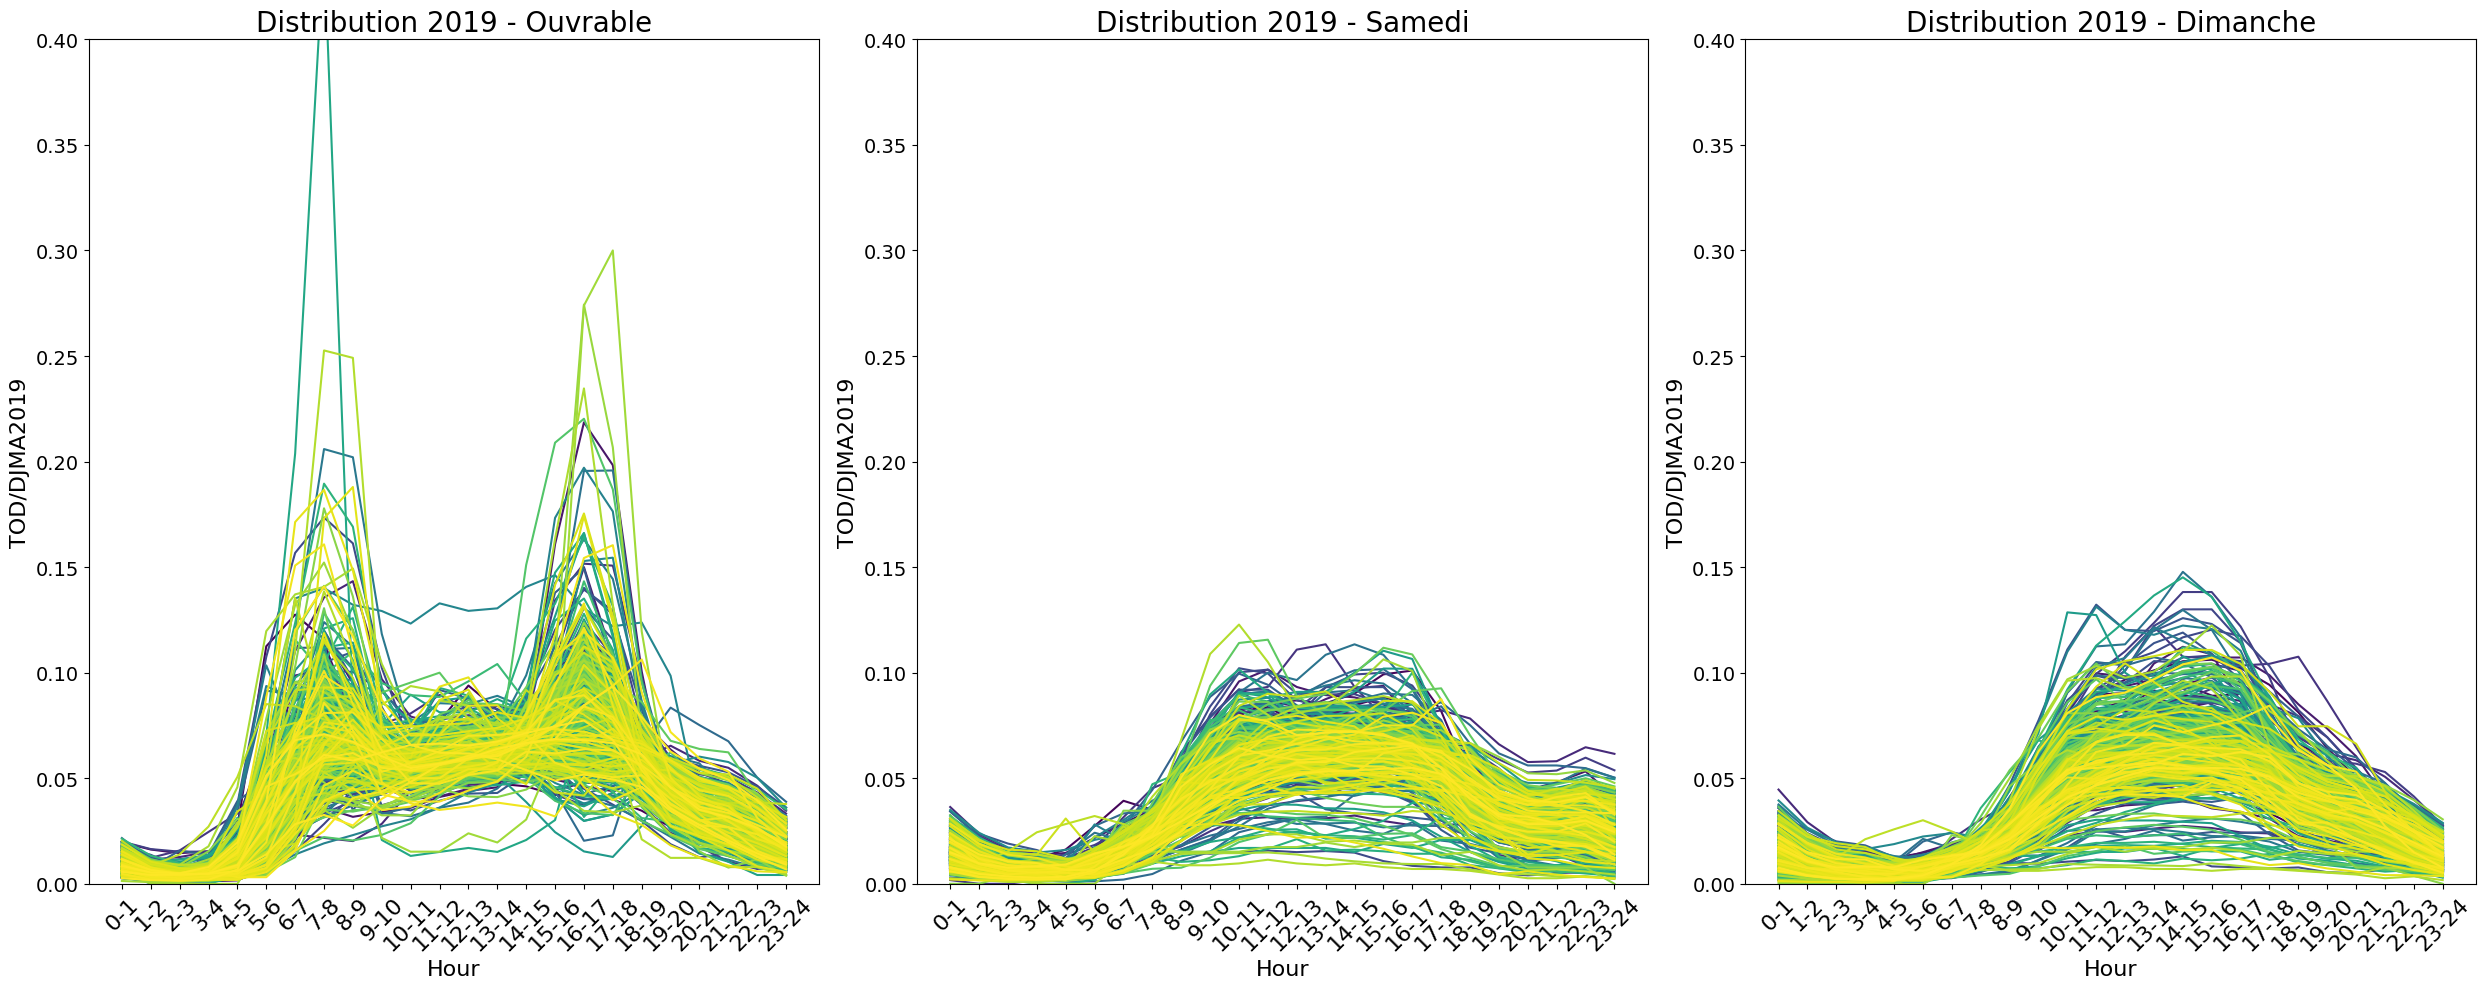

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns


# Define the figure and axes for the subplots
fig, axes = plt.subplots(1, 3, figsize=(25, 10))  # 1 row, 3 columns
# Plot for OUVRABLE
sns.lineplot(data=filtered_df, x='HRE', y='OUVRABLE', hue='SECTN', ax=axes[0], palette='viridis', legend=False)
axes[0].set_title('Distribution 2019 - Ouvrable', fontsize=20)
axes[0].set_xlabel('Hour', fontsize=16)
axes[0].set_ylabel('TOD/DJMA2019', fontsize=16)
axes[0].set_xticks(range(len(hour_order)))
axes[0].set_xticklabels(hour_order, rotation=45, fontsize=16)
axes[0].set_ylim(0, 0.4)
axes[0].tick_params(axis='y', labelsize=14)

# Plot for SAMEDI
sns.lineplot(data=filtered_df, x='HRE', y='SAMEDI', hue='SECTN', ax=axes[1], palette='viridis', legend=False)
axes[1].set_title('Distribution 2019 - Samedi', fontsize=20)
axes[1].set_xlabel('Hour', fontsize=16)
axes[1].set_ylabel('TOD/DJMA2019', fontsize=16)
axes[1].set_xticks(range(len(hour_order)))
axes[1].set_xticklabels(hour_order, rotation=45, fontsize=16)
axes[1].set_ylim(0, 0.4)
axes[1].tick_params(axis='y', labelsize=14)

# Plot for DIMANCHE
sns.lineplot(data=filtered_df, x='HRE', y='DIMANCHE', hue='SECTN', ax=axes[2], palette='viridis', legend=False)
axes[2].set_title('Distribution 2019 - Dimanche', fontsize=20)
axes[2].set_xlabel('Hour', fontsize=16)
axes[2].set_ylabel('TOD/DJMA2019', fontsize=16)
axes[2].set_xticks(range(len(hour_order)))
axes[2].set_xticklabels(hour_order, rotation=45, fontsize=16)
axes[2].set_ylim(0, 0.4)
axes[2].tick_params(axis='y', labelsize=14)

# layout and display the plot
plt.tight_layout()
plt.show()


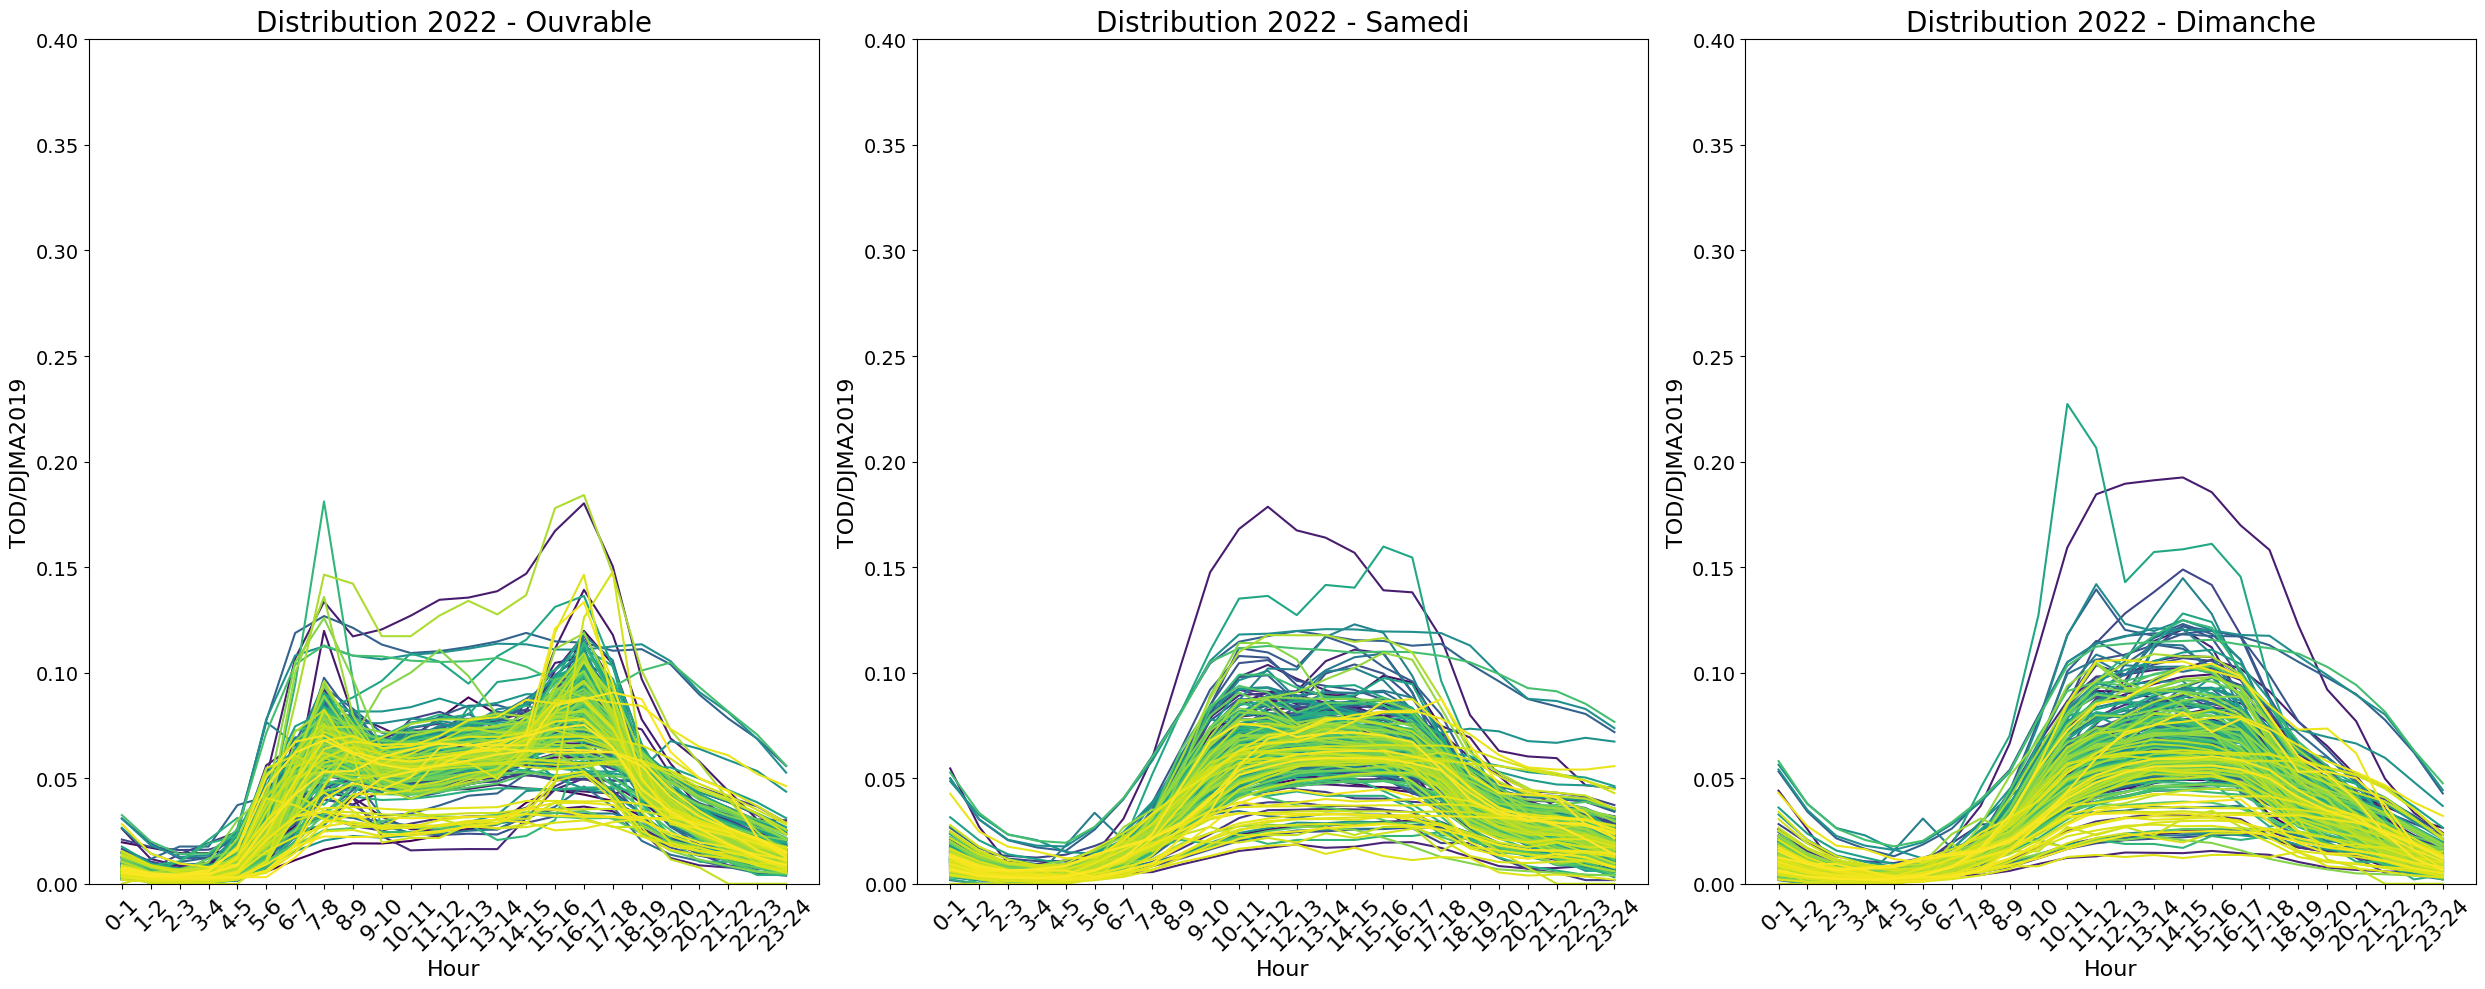

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

year = 2022  # The year
sectn_values = normalize_hour_merged_2019[normalize_hour_merged_2019['ANNEE'] == year]['SECTN'].unique()

# Filter the DataFrame to only include rows where 'HRE' is in 'hour_order'
filtered_df2 = normalize_hour_merged_2019[(normalize_hour_merged_2019['ANNEE'] == year) &
                                    (normalize_hour_merged_2019['SECTN'].isin(sectn_values)) &
                                    (normalize_hour_merged_2019['HRE'].isin(hour_order))]


# Define the figure and axes for the subplots
fig, axes = plt.subplots(1, 3, figsize=(25, 10))  # 1 row, 3 columns
# Plot for OUVRABLE
sns.lineplot(data=filtered_df, x='HRE', y='OUVRABLE', hue='SECTN', ax=axes[0], palette='viridis', legend=False)
axes[0].set_title('Distribution 2022 - Ouvrable', fontsize=20)
axes[0].set_xlabel('Hour', fontsize=16)
axes[0].set_ylabel('TOD/DJMA2019', fontsize=16)
axes[0].set_xticks(range(len(hour_order)))
axes[0].set_xticklabels(hour_order, rotation=45, fontsize=16)
axes[0].set_ylim(0, 0.4)
axes[0].tick_params(axis='y', labelsize=14)

# Plot for SAMEDI
sns.lineplot(data=filtered_df, x='HRE', y='SAMEDI', hue='SECTN', ax=axes[1], palette='viridis', legend=False)
axes[1].set_title('Distribution 2022 - Samedi', fontsize=20)
axes[1].set_xlabel('Hour', fontsize=16)
axes[1].set_ylabel('TOD/DJMA2019', fontsize=16)
axes[1].set_xticks(range(len(hour_order)))
axes[1].set_xticklabels(hour_order, rotation=45, fontsize=16)
axes[1].set_ylim(0, 0.4)
axes[1].tick_params(axis='y', labelsize=14)

# Plot for DIMANCHE
sns.lineplot(data=filtered_df, x='HRE', y='DIMANCHE', hue='SECTN', ax=axes[2], palette='viridis', legend=False)
axes[2].set_title('Distribution 2022 - Dimanche', fontsize=20)
axes[2].set_xlabel('Hour', fontsize=16)
axes[2].set_ylabel('TOD/DJMA2019', fontsize=16)
axes[2].set_xticks(range(len(hour_order)))
axes[2].set_xticklabels(hour_order, rotation=45, fontsize=16)
axes[2].set_ylim(0, 0.4)
axes[2].tick_params(axis='y', labelsize=14)
# layout and display the plot
plt.tight_layout()
plt.show()

In [104]:
filtered_df

,SECTN,ANNEE,HRE,DIMANCHE,SAMEDI,OUVRABLE,DJMA_total,DJME_total,DJMH_total,DJMA_total_2019,DJMA_total_2022
175,0005512000,2019,0-1,0.012639,0.010069,0.004861,14400.0,16000.0,12800.0,14400.0,13600.0
176,0005512000,2019,1-2,0.006458,0.004722,0.002708,14400.0,16000.0,12800.0,14400.0,13600.0
177,0005512000,2019,2-3,0.003194,0.002847,0.002500,14400.0,16000.0,12800.0,14400.0,13600.0
178,0005512000,2019,3-4,0.002083,0.002500,0.002917,14400.0,16000.0,12800.0,14400.0,13600.0
179,0005512000,2019,4-5,0.002292,0.003264,0.006528,14400.0,16000.0,12800.0,14400.0,13600.0
...,...,...,...,...,...,...,...,...,...,...,...
89819,0002062000,2019,19-20,0.056250,0.032833,0.035750,12000.0,14900.0,9700.0,12000.0,11600.0
89820,0002062000,2019,20-21,0.045250,0.031750,0.027917,12000.0,14900.0,9700.0,12000.0,11600.0
89821,0002062000,2019,21-22,0.027250,0.028583,0.020500,12000.0,14900.0,9700.0,12000.0,11600.0
89822,0002062000,2019,22-23,0.014917,0.023167,0.014417,12000.0,14900.0,9700.0,12000.0,11600.0


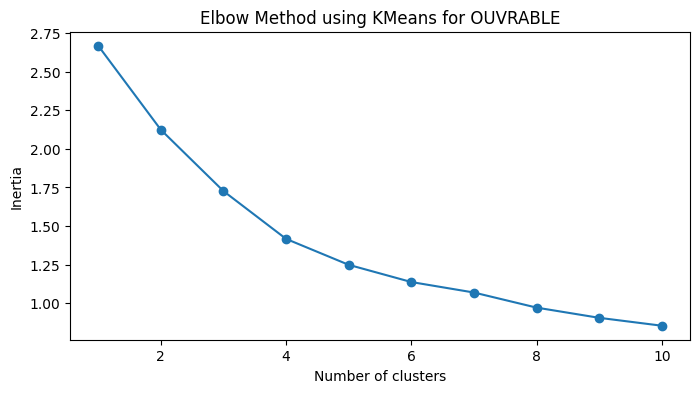

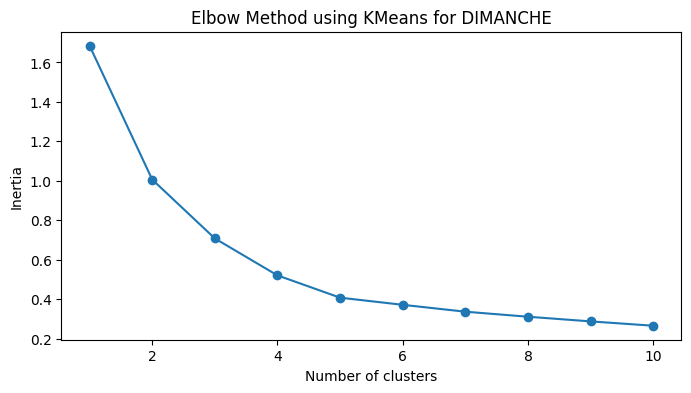

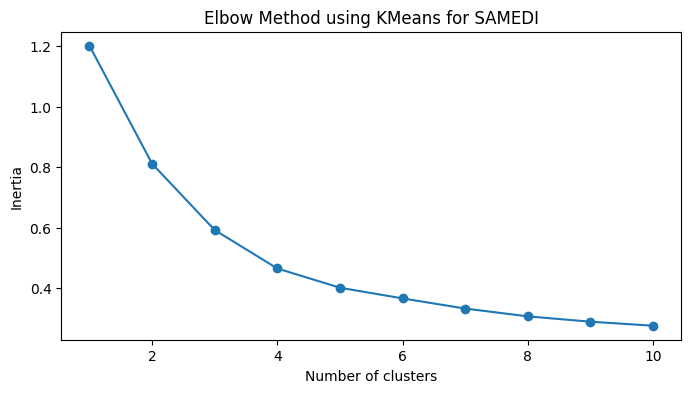

In [110]:
from sklearn.cluster import KMeans

def fit_kmeans(data, n_clusters=4, n_init=10):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=0).fit(data)
    return kmeans.labels_

def calculate_elbow_with_kmeans(data, max_clusters=10, n_init=10):
    inertias = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, n_init=n_init, random_state=0).fit(data)
        inertias.append(kmeans.inertia_)
    return inertias

# Define the function to process data and plot elbow
def process_and_plot_elbow_kmeans(df, hour_column, value_column, max_clusters=10):
    # Pivot the DataFrame
    df_pivot = df[df['ANNEE'] == 2019].pivot(index='SECTN', columns=hour_column, values=value_column)
    df_pivot.fillna(0, inplace=True)

    # Convert the pivot table to a 2D numpy array
    X = np.array(df_pivot)

    # Calculate inertia using KMeans
    inertia = calculate_elbow_with_kmeans(X, max_clusters, n_init=10)

    # Plot
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
    plt.title(f'Elbow Method using KMeans for {value_column}')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

# Run the process for each traffic type
process_and_plot_elbow_kmeans(filtered_df, 'HRE', 'OUVRABLE', max_clusters=10)
process_and_plot_elbow_kmeans(filtered_df, 'HRE', 'DIMANCHE', max_clusters=10)
process_and_plot_elbow_kmeans(filtered_df, 'HRE', 'SAMEDI', max_clusters=10)


In [106]:
from sklearn.cluster import KMeans

def add_cluster_labels(df, hour_column, value_column, n_clusters=4, suffix=''):
    # First, ensure that there are no duplicate entries for the combination of SECTN and hour_column
    df_agg = df.groupby(['SECTN', hour_column])[value_column].mean().reset_index()

    # Now you can pivot without duplicates
    df_pivot = df_agg.pivot(index='SECTN', columns=hour_column, values=value_column)
    df_pivot.fillna(0, inplace=True)

    # The rest of your code remains the same...
    X = df_pivot.values
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    labels = kmeans.labels_

    label_column = 'cluster' + suffix
    label_series = pd.Series(labels, index=df_pivot.index)
    df[label_column] = df['SECTN'].map(label_series.to_dict())

    return df

# The column containing hour ranges
hour_column = 'HRE'

# Perform clustering for each type of day
cluster_hour_merged_2019 = add_cluster_labels(filtered_df, hour_column, 'OUVRABLE', n_clusters=3, suffix='_OUVRABLE')
cluster_hour_merged_2019= add_cluster_labels(filtered_df, hour_column, 'SAMEDI', n_clusters=3, suffix='_SAMEDI')
cluster_hour_merged_2019= add_cluster_labels(filtered_df, hour_column, 'DIMANCHE', n_clusters=3, suffix='_DIMANCHE')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-106-9dc9a283e34a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label_column] = df['SECTN'].map(label_series.to_dict())
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-106-9dc9a283e34a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [67]:

year = 2022  # The year
sectn_values2 = normalize_hour_merged_2019[normalize_hour_merged_2019['ANNEE'] == year]['SECTN'].unique()

# Filter the DataFrame to only include rows where 'HRE' is in 'hour_order' - " to FILTER THE Total value"
filtered_df2 = normalize_hour_merged_2019[(normalize_hour_merged_2019['ANNEE'] == year) &
                                    (normalize_hour_merged_2019['SECTN'].isin(sectn_values)) &
                                    (normalize_hour_merged_2019['HRE'].isin(hour_order))]


In [101]:
filtered_df

,SECTN,ANNEE,HRE,DIMANCHE,SAMEDI,OUVRABLE,DJMA_total,DJME_total,DJMH_total,DJMA_total_2019,DJMA_total_2022,cluster_OUVRABLE,cluster_SAMEDI,cluster_DIMANCHE
175,0005512000,2019,0-1,0.012639,0.010069,0.004861,14400.0,16000.0,12800.0,14400.0,13600.0,3,1,3
176,0005512000,2019,1-2,0.006458,0.004722,0.002708,14400.0,16000.0,12800.0,14400.0,13600.0,3,1,3
177,0005512000,2019,2-3,0.003194,0.002847,0.002500,14400.0,16000.0,12800.0,14400.0,13600.0,3,1,3
178,0005512000,2019,3-4,0.002083,0.002500,0.002917,14400.0,16000.0,12800.0,14400.0,13600.0,3,1,3
179,0005512000,2019,4-5,0.002292,0.003264,0.006528,14400.0,16000.0,12800.0,14400.0,13600.0,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89819,0002062000,2019,19-20,0.056250,0.032833,0.035750,12000.0,14900.0,9700.0,12000.0,11600.0,3,1,3
89820,0002062000,2019,20-21,0.045250,0.031750,0.027917,12000.0,14900.0,9700.0,12000.0,11600.0,3,1,3
89821,0002062000,2019,21-22,0.027250,0.028583,0.020500,12000.0,14900.0,9700.0,12000.0,11600.0,3,1,3
89822,0002062000,2019,22-23,0.014917,0.023167,0.014417,12000.0,14900.0,9700.0,12000.0,11600.0,3,1,3


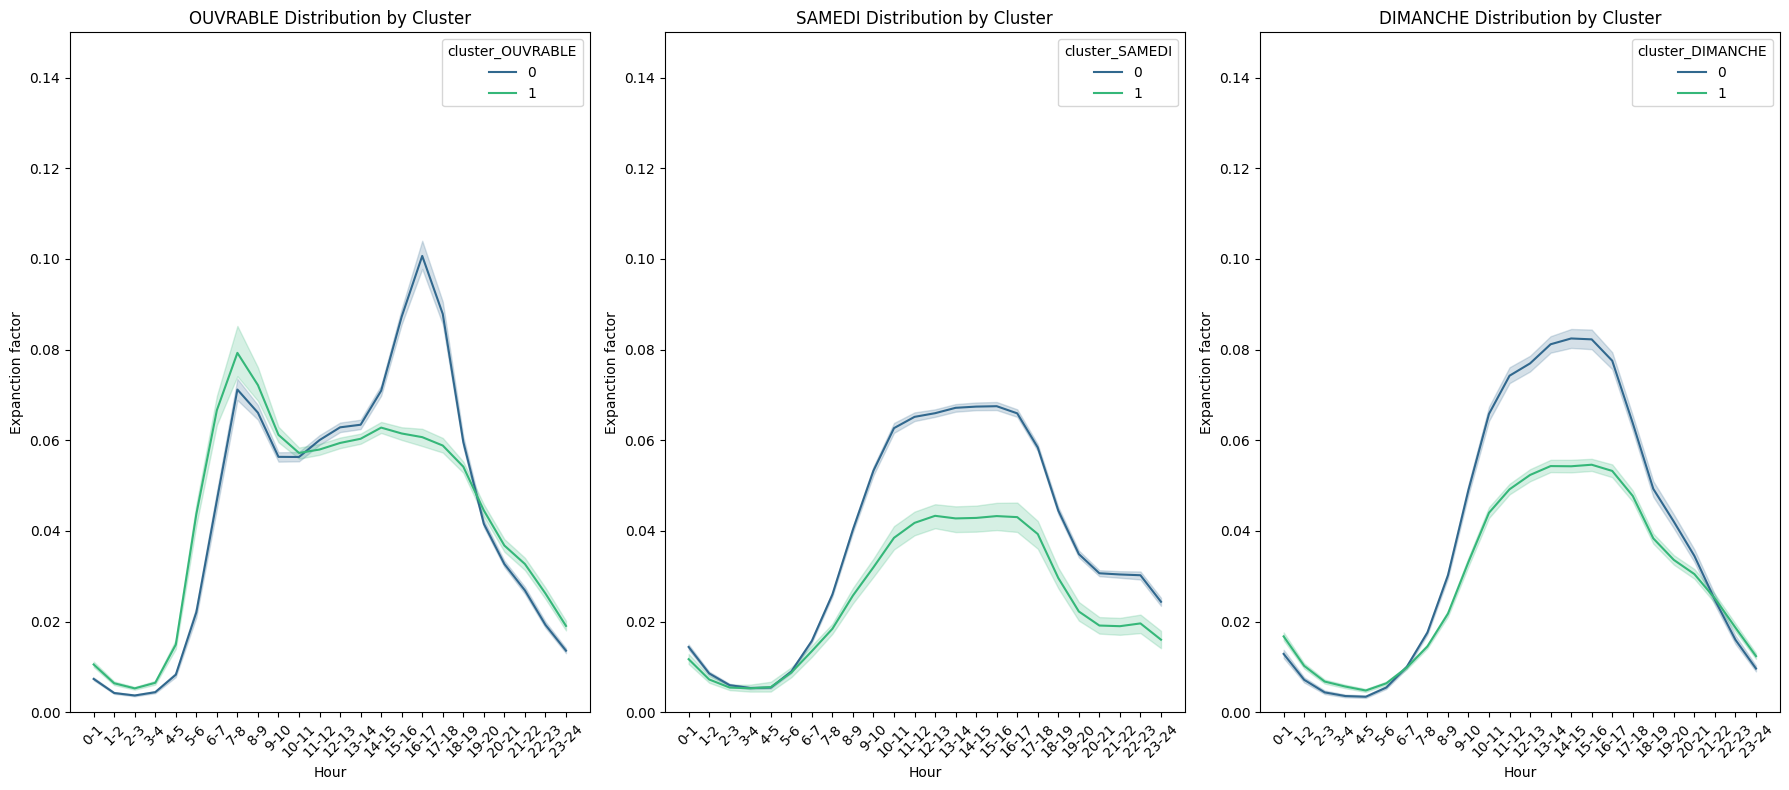

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns


# Define y-axis limits if known, for example:
y_limits = (0, 0.15)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

# OUVRABLE
sns.lineplot(data=filtered_df, x='HRE', y='OUVRABLE', hue='cluster_OUVRABLE', palette='viridis', ax=axes[0])
axes[0].set_title('OUVRABLE Distribution by Cluster')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Expanction factor')
axes[0].set_xticks(range(len(hour_order)))
axes[0].set_xticklabels(hour_order, rotation=45)
axes[0].legend(title='cluster_OUVRABLE')
axes[0].set_ylim(y_limits)

# SAMEDI
sns.lineplot(data=filtered_df, x='HRE', y='SAMEDI', hue='cluster_SAMEDI', palette='viridis', ax=axes[1])
axes[1].set_title('SAMEDI Distribution by Cluster')
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Expanction factor')
axes[1].set_xticks(range(len(hour_order)))
axes[1].set_xticklabels(hour_order, rotation=45)
axes[1].legend(title='cluster_SAMEDI')
axes[1].set_ylim(y_limits)

# DIMANCHE
sns.lineplot(data=filtered_df, x='HRE', y='DIMANCHE', hue='cluster_DIMANCHE', palette='viridis', ax=axes[2])
axes[2].set_title('DIMANCHE Distribution by Cluster')
axes[2].set_xlabel('Hour')
axes[2].set_ylabel('Expanction factor')
axes[2].set_xticks(range(len(hour_order)))  # Set the ticks to match the hour order
axes[2].set_xticklabels(hour_order, rotation=45)
axes[2].legend(title='cluster_DIMANCHE')
axes[2].set_ylim(y_limits)

# layout and display the plot
plt.tight_layout()
plt.show()

In [23]:
filtered_df2

,SECTN,ANNEE,HRE,DIMANCHE,SAMEDI,OUVRABLE,DJMA_total,DJME_total,DJMH_total,DJMA_total_2019,DJMA_total_2022,cluster_OUVRABLE,cluster_SAMEDI,cluster_DIMANCHE
175,0005512000,2019,0-1,0.012639,0.010069,0.004861,14400.0,16000.0,12800.0,14400.0,13600.0,0,1,0
176,0005512000,2019,1-2,0.006458,0.004722,0.002708,14400.0,16000.0,12800.0,14400.0,13600.0,0,1,0
177,0005512000,2019,2-3,0.003194,0.002847,0.002500,14400.0,16000.0,12800.0,14400.0,13600.0,0,1,0
178,0005512000,2019,3-4,0.002083,0.002500,0.002917,14400.0,16000.0,12800.0,14400.0,13600.0,0,1,0
179,0005512000,2019,4-5,0.002292,0.003264,0.006528,14400.0,16000.0,12800.0,14400.0,13600.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89819,0002062000,2019,19-20,0.056250,0.032833,0.035750,12000.0,14900.0,9700.0,12000.0,11600.0,0,1,2
89820,0002062000,2019,20-21,0.045250,0.031750,0.027917,12000.0,14900.0,9700.0,12000.0,11600.0,0,1,2
89821,0002062000,2019,21-22,0.027250,0.028583,0.020500,12000.0,14900.0,9700.0,12000.0,11600.0,0,1,2
89822,0002062000,2019,22-23,0.014917,0.023167,0.014417,12000.0,14900.0,9700.0,12000.0,11600.0,0,1,2


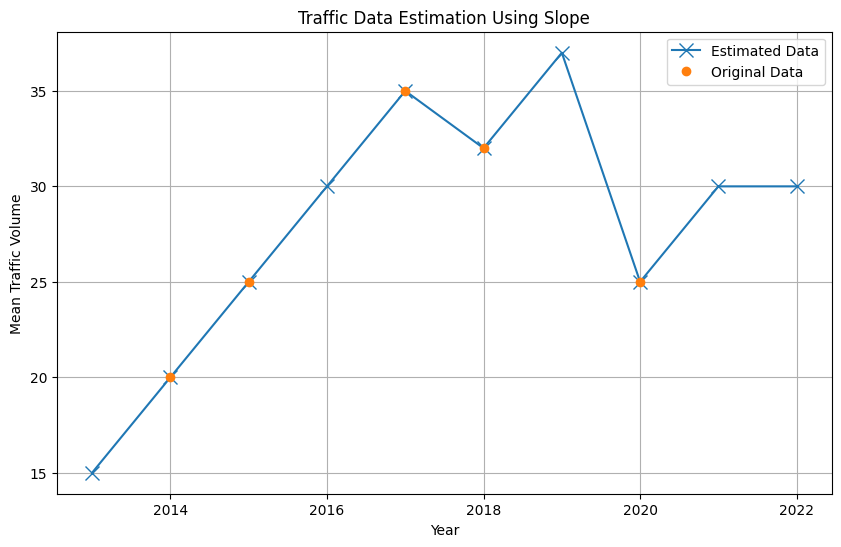

In [10]:
# slope example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Simulated data
data = {
    'RTSS': ['001'] * 10,
    'Year': np.arange(2013, 2023),
    'Mean_Value': [None, 20, 25, None, 35, 32, None, 25, None, None]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Manually setting a slope for the purpose of this example
slope = 5

# Function to estimate missing values using the slope
def estimate_values(df, slope):
    # Forward fill and backward fill to get the first and last known values
    filled_df = df.fillna(method='ffill').fillna(method='bfill')
    years = df['Year'].values
    values = filled_df['Mean_Value'].values

    # Replace None with np.nan to work with numerical operations
    df['Mean_Value'] = df['Mean_Value'].apply(lambda x: np.nan if x is None else x)

    # Estimate missing values using the slope
    for i, year in enumerate(years):
        if np.isnan(df.at[i, 'Mean_Value']):
            # Calculate the number of years from the nearest known value
            year_diff = year - years[i-1] if i > 0 else years[i+1] - year
            # Use the slope to estimate the missing value
            df.at[i, 'Mean_Value'] = values[i-1] + slope * year_diff if i > 0 else values[i+1] - slope * year_diff

    return df

# Estimate the missing values
estimated_df = estimate_values(df.copy(), slope)

# Plot the original and estimated values
plt.figure(figsize=(10, 6))
plt.plot('Year', 'Mean_Value', data=estimated_df, marker='x', linestyle='-', label='Estimated Data', markersize = 10)
plt.plot('Year', 'Mean_Value', data=df, marker='o', linestyle='', label='Original Data')

# Adding title and labels
plt.title('Traffic Data Estimation Using Slope')
plt.xlabel('Year')
plt.ylabel('Mean Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()


In [117]:
filtered_df


,SECTN,ANNEE,HRE,DIMANCHE,SAMEDI,OUVRABLE,DJMA_total,DJME_total,DJMH_total,DJMA_total_2019,DJMA_total_2022
175,0005512000,2019,0-1,0.012639,0.010069,0.004861,14400.0,16000.0,12800.0,14400.0,13600.0
176,0005512000,2019,1-2,0.006458,0.004722,0.002708,14400.0,16000.0,12800.0,14400.0,13600.0
177,0005512000,2019,2-3,0.003194,0.002847,0.002500,14400.0,16000.0,12800.0,14400.0,13600.0
178,0005512000,2019,3-4,0.002083,0.002500,0.002917,14400.0,16000.0,12800.0,14400.0,13600.0
179,0005512000,2019,4-5,0.002292,0.003264,0.006528,14400.0,16000.0,12800.0,14400.0,13600.0
...,...,...,...,...,...,...,...,...,...,...,...
89819,0002062000,2019,19-20,0.056250,0.032833,0.035750,12000.0,14900.0,9700.0,12000.0,11600.0
89820,0002062000,2019,20-21,0.045250,0.031750,0.027917,12000.0,14900.0,9700.0,12000.0,11600.0
89821,0002062000,2019,21-22,0.027250,0.028583,0.020500,12000.0,14900.0,9700.0,12000.0,11600.0
89822,0002062000,2019,22-23,0.014917,0.023167,0.014417,12000.0,14900.0,9700.0,12000.0,11600.0


In [118]:

# Function to calculate KMeans inertia for a range of cluster numbers to find the elbow
def calculate_elbow_with_kmeans(data, max_clusters=10):
    inertias = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=0).fit(data)
        inertias.append(kmeans.inertia_)
    return inertias

# Function to plot the elbow curve
def plot_elbow_curve(inertia, value_column):
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, len(inertia) + 1), inertia, marker='o')
    plt.title(f'Elbow Method using KMeans for {value_column}')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

# Function to add cluster labels to the dataframe
def add_cluster_labels(df, value_column, n_clusters, suffix):
    # Pivot the DataFrame to get SECTN as index and value_column as values
    data = df.pivot_table(index='SECTN', values=value_column, aggfunc='mean').fillna(0)

    # Fit KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data)

    # Create a column with cluster labels
    cluster_labels = pd.Series(kmeans.labels_, index=data.index)
    df[f'cluster_{suffix}'] = df['SECTN'].map(cluster_labels)

    return df


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

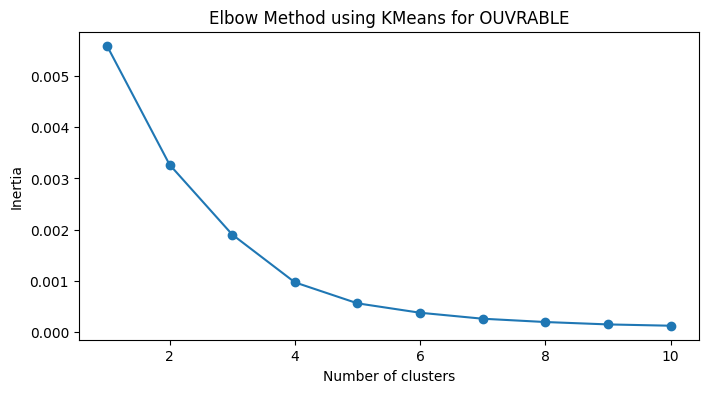

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-118-c5d110970949>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'cluster_{suffix}'] = df['SECTN'].map(cluster_labels)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

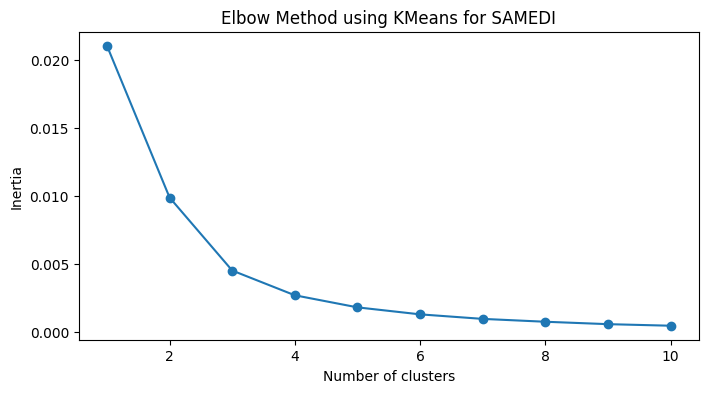

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-118-c5d110970949>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'cluster_{suffix}'] = df['SECTN'].map(cluster_labels)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

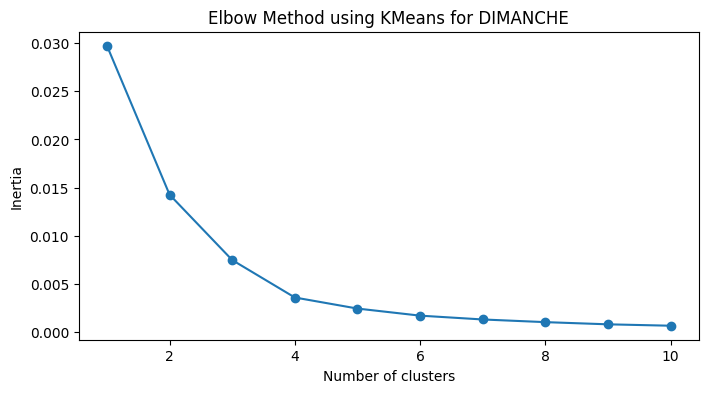

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-118-c5d110970949>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'cluster_{suffix}'] = df['SECTN'].map(cluster_labels)


In [119]:
# Define the day types
day_types = ['OUVRABLE', 'SAMEDI', 'DIMANCHE']

# Perform the elbow method analysis and clustering for each day type
for day_type in day_types:
    # Run the elbow method
    elbow_data = filtered_df.pivot_table(index='SECTN', values=day_type, aggfunc='mean').fillna(0)
    inertia = calculate_elbow_with_kmeans(elbow_data)

    # Plot the elbow curve
    plot_elbow_curve(inertia, day_type)

    # Assuming you choose n_clusters based on the elbow curve, for example n_clusters = 4
    n_clusters = 3  # This should be chosen based on the elbow plot

    # Add cluster labels to the dataframe
    filtered_df = add_cluster_labels(filtered_df, day_type, n_clusters, day_type)


In [120]:
filtered_df

,SECTN,ANNEE,HRE,DIMANCHE,SAMEDI,OUVRABLE,DJMA_total,DJME_total,DJMH_total,DJMA_total_2019,DJMA_total_2022,cluster_OUVRABLE,cluster_SAMEDI,cluster_DIMANCHE
175,0005512000,2019,0-1,0.012639,0.010069,0.004861,14400.0,16000.0,12800.0,14400.0,13600.0,0,0,0
176,0005512000,2019,1-2,0.006458,0.004722,0.002708,14400.0,16000.0,12800.0,14400.0,13600.0,0,0,0
177,0005512000,2019,2-3,0.003194,0.002847,0.002500,14400.0,16000.0,12800.0,14400.0,13600.0,0,0,0
178,0005512000,2019,3-4,0.002083,0.002500,0.002917,14400.0,16000.0,12800.0,14400.0,13600.0,0,0,0
179,0005512000,2019,4-5,0.002292,0.003264,0.006528,14400.0,16000.0,12800.0,14400.0,13600.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89819,0002062000,2019,19-20,0.056250,0.032833,0.035750,12000.0,14900.0,9700.0,12000.0,11600.0,0,0,0
89820,0002062000,2019,20-21,0.045250,0.031750,0.027917,12000.0,14900.0,9700.0,12000.0,11600.0,0,0,0
89821,0002062000,2019,21-22,0.027250,0.028583,0.020500,12000.0,14900.0,9700.0,12000.0,11600.0,0,0,0
89822,0002062000,2019,22-23,0.014917,0.023167,0.014417,12000.0,14900.0,9700.0,12000.0,11600.0,0,0,0


from matplotlib import pyplot as plt
filtered_df['DIMANCHE'].plot(kind='hist', bins=20, title='DIMANCHE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
filtered_df['SAMEDI'].plot(kind='hist', bins=20, title='SAMEDI')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
filtered_df['OUVRABLE'].plot(kind='hist', bins=20, title='OUVRABLE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
filtered_df['DJMA_total'].plot(kind='hist', bins=20, title='DJMA_total')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
filtered_df.plot(kind='scatter', x='DIMANCHE', y='SAMEDI', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
filtered_df.plot(kind='scatter', x='SAMEDI', y='OUVRABLE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
filtered_df.plot(kind='scatter', x='OUVRABLE', y='DJMA_total', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
filtered_df.plot(kind='scatter', x='DJMA_total', y='DJME_total', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ANNEE']
  ys = series['DIMANCHE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = filtered_df.sort_values('ANNEE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ANNEE')
_ = plt.ylabel('DIMANCHE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ANNEE']
  ys = series['SAMEDI']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = filtered_df.sort_values('ANNEE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ANNEE')
_ = plt.ylabel('SAMEDI')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ANNEE']
  ys = series['OUVRABLE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = filtered_df.sort_values('ANNEE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ANNEE')
_ = plt.ylabel('OUVRABLE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ANNEE']
  ys = series['DJMA_total']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = filtered_df.sort_values('ANNEE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ANNEE')
_ = plt.ylabel('DJMA_total')

from matplotlib import pyplot as plt
filtered_df['DIMANCHE'].plot(kind='line', figsize=(8, 4), title='DIMANCHE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
filtered_df['SAMEDI'].plot(kind='line', figsize=(8, 4), title='SAMEDI')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
filtered_df['OUVRABLE'].plot(kind='line', figsize=(8, 4), title='OUVRABLE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
filtered_df['DJMA_total'].plot(kind='line', figsize=(8, 4), title='DJMA_total')
plt.gca().spines[['top', 'right']].set_visible(False)

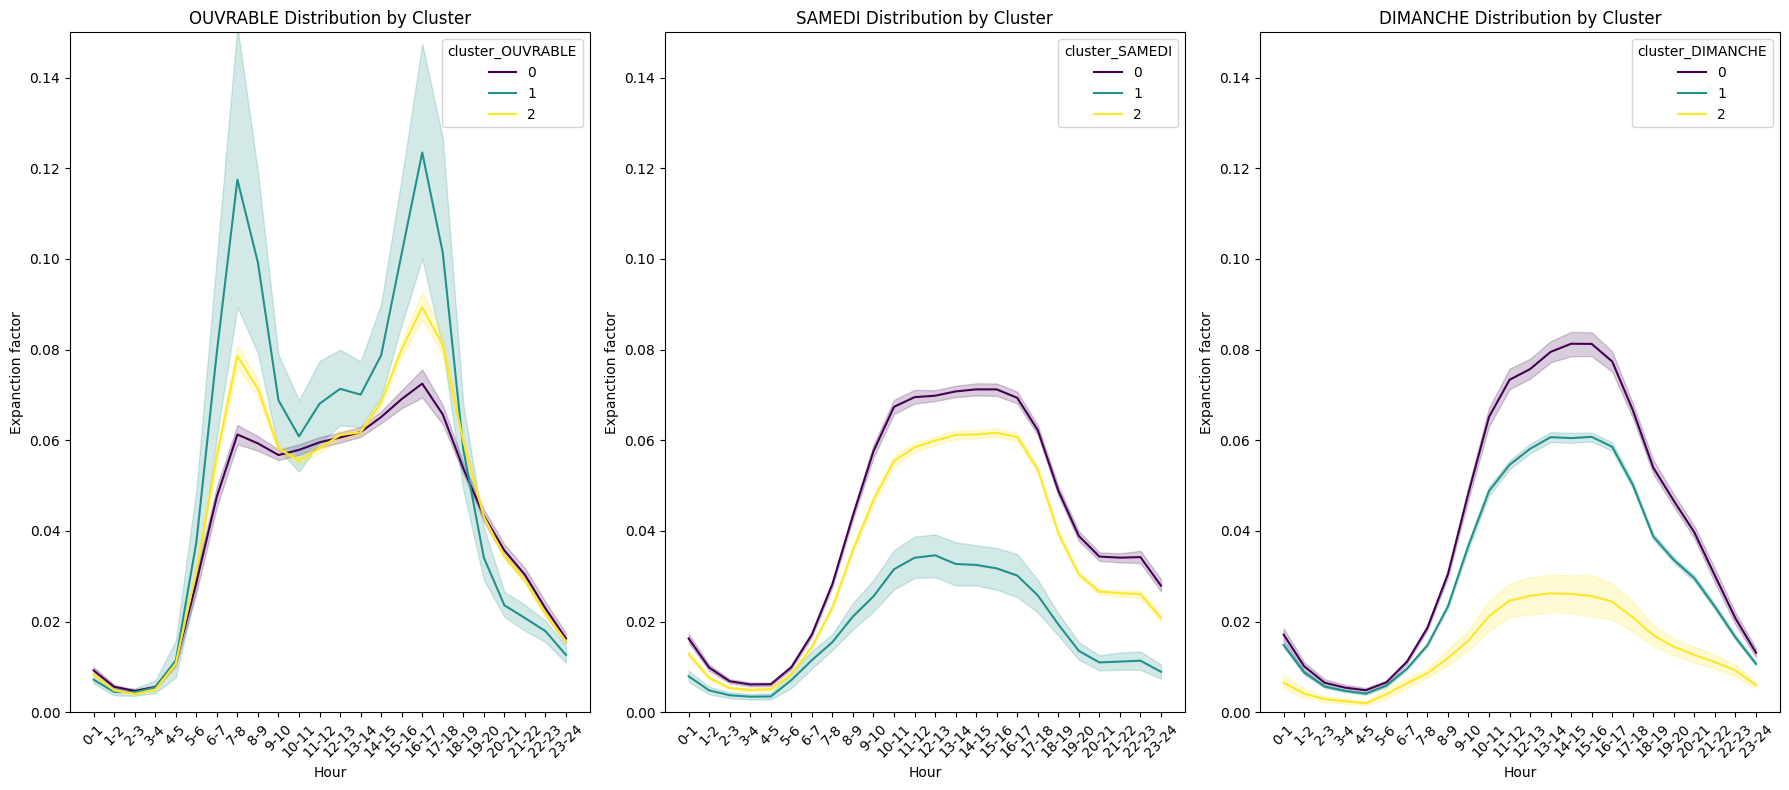

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns


# Define y-axis limits if known, for example:
y_limits = (0, 0.15)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

# OUVRABLE
sns.lineplot(data=filtered_df, x='HRE', y='OUVRABLE', hue='cluster_OUVRABLE', palette='viridis', ax=axes[0])
axes[0].set_title('OUVRABLE Distribution by Cluster')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Expanction factor')
axes[0].set_xticks(range(len(hour_order)))
axes[0].set_xticklabels(hour_order, rotation=45)
axes[0].legend(title='cluster_OUVRABLE')
axes[0].set_ylim(y_limits)

# SAMEDI
sns.lineplot(data=filtered_df, x='HRE', y='SAMEDI', hue='cluster_SAMEDI', palette='viridis', ax=axes[1])
axes[1].set_title('SAMEDI Distribution by Cluster')
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Expanction factor')
axes[1].set_xticks(range(len(hour_order)))
axes[1].set_xticklabels(hour_order, rotation=45)
axes[1].legend(title='cluster_SAMEDI')
axes[1].set_ylim(y_limits)

# DIMANCHE
sns.lineplot(data=filtered_df, x='HRE', y='DIMANCHE', hue='cluster_DIMANCHE', palette='viridis', ax=axes[2])
axes[2].set_title('DIMANCHE Distribution by Cluster')
axes[2].set_xlabel('Hour')
axes[2].set_ylabel('Expanction factor')
axes[2].set_xticks(range(len(hour_order)))  # Set the ticks to match the hour order
axes[2].set_xticklabels(hour_order, rotation=45)
axes[2].legend(title='cluster_DIMANCHE')
axes[2].set_ylim(y_limits)

# layout and display the plot
plt.tight_layout()
plt.show()